<a href="https://colab.research.google.com/github/sandeep1847e/Phy654-data/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# all the necessary imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#**Ans 1**
# size of the images available in MNIST dataset




In [3]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)


# Visualizing 4 random images from training set

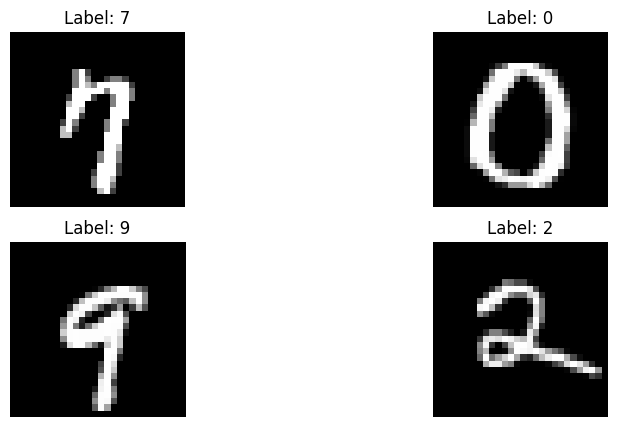

In [4]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    idx = np.random.randint(len(x_train))
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()


# Visualizing 4 random images from test set

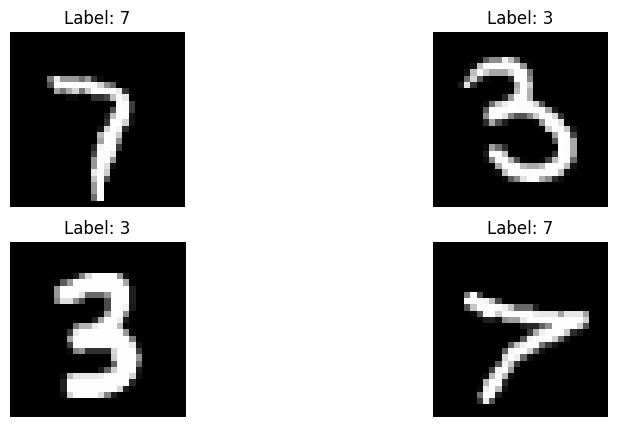

In [5]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    idx = np.random.randint(len(x_test))
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Label: {y_test[idx]}")
    plt.axis('off')
plt.show()


**Ans 2**

In [6]:
print("Number of training images:", len(x_train))
print("Number of testing images:", len(x_test))

Number of training images: 60000
Number of testing images: 10000


#**Preprocessing**


In [7]:
#reshaping and dividing by 255 to make the element of matrix in [0,1]
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [8]:
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#**Ans 3 to 8**

In [9]:
model = Sequential([
    Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),  # Ans3
    BatchNormalization(),
    AveragePooling2D((2, 2)),  # Ans 4

    Conv2D(16, (3, 3), padding='same', activation='relu'),  # Ans 5
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # Ans 6

    Conv2D(4, (1, 1), activation='relu'),  # Ans 7
    BatchNormalization(),
    #Ans 8
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 4)             │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 4)             │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,798 (7.02 KB)

 Trainable params: 1,742 (6.80 KB)

 Non-trainable params: 56 (224.00 B)


# Ans 9
# Compile and fit


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7111 - loss: 0.9258 - val_accuracy: 0.9569 - val_loss: 0.1423
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9547 - loss: 0.1470 - val_accuracy: 0.9631 - val_loss: 0.1063
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.1049 - val_accuracy: 0.9724 - val_loss: 0.0834
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9711 - loss: 0.0912 - val_accuracy: 0.9701 - val_loss: 0.0881
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0810 - val_accuracy: 0.9761 - val_loss: 0.0715
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0759 - val_accuracy: 0.9747 - val_loss: 0.0737
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0742 - val_accuracy: 0.9778 - val_loss: 0.0658
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9788 - loss: 0.0664 

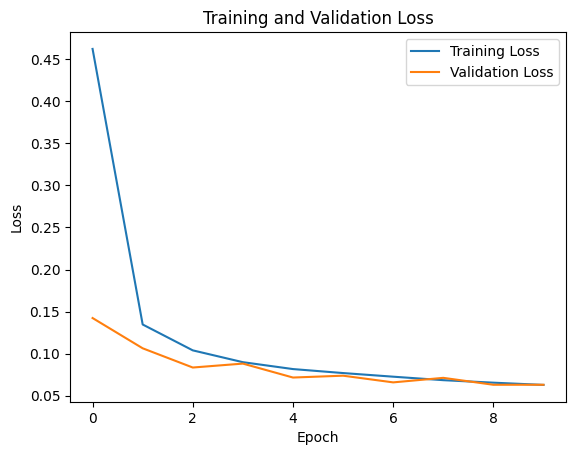

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 10. Evaluating on test set

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0711
Test accuracy: 97.93%
